# Deep Learning - Convolutional Neural Networks (CNNs)

## About
A convolutional neural network is a class of deep neural networks, most commonly applied to analyzing visual imagery.
CNNs are regularized versions of multilayer perceptrons.
They take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns.

## Convolution

![](../images/convolution.gif)

### Hyperparameters of Convolution Filter
- the kernel size
- the filter count (that is, how many filters do we want to use)
- stride (how big are the steps of the filter)
- padding

## Convolution Filter

![](http://cs231n.github.io/assets/cnn/weights.jpeg)

## Pooling

![](../images/pooling.png)

## MNIST OCR Example

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [12]:
# Read MNIST data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


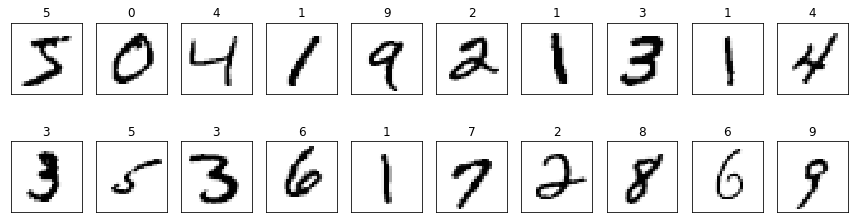

In [13]:
# Display sample images.
plt.figure(figsize=(15, 4))
for digit in range(20):
    plt.subplot(2, 10, digit + 1)
    plt.xticks([]); plt.yticks([])
    plt.title(y_train[digit])
    plt.imshow(x_train[digit], cmap='Greys')

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train =', x_train.shape[0])
print('Number of images in x_test =', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train = 60000
Number of images in x_test = 10000


In [15]:
# Create networks.
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Using TensorFlow backend.
W0725 17:56:01.948119 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 17:56:01.957776 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 17:56:01.959585 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 17:56:01.969743 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is depreca

In [16]:
# Train networks.
model.fit(x=x_train, y=y_train, epochs=10)

W0725 17:56:02.013073 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 17:56:02.028264 140065761716032 deprecation_wrapper.py:119] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 17:56:02.088232 140065761716032 deprecation.py:323] From /home/doosik/.conda/envs/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.2020 - acc: 0.9399
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0830 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0553 - acc: 0.9828
Epoch 4/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0438 - acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0367 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0297 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0226 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0231 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0200 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 16s 259us/step - loss: 

In [17]:
# Test networks.
loss, metrics = model.evaluate(x_test, y_test)
print('loss =', loss)
print('metrics =', metrics)

10000/10000 [==============================] - 1s 53us/step
loss = 0.06001054443193352
metrics = 0.9862


## Reference
- https://en.wikipedia.org/wiki/Convolutional_neural_network
- http://cs231n.github.io/convolutional-networks/
- https://www.tensorflow.org/beta/tutorials/images/intro_to_cnns